In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import datetime


news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
news_df.head()
news_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


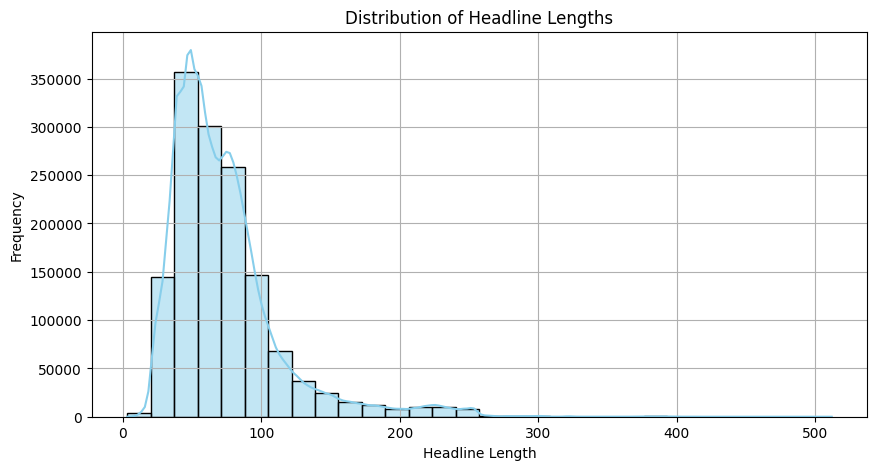

In [2]:
# Calculate length of each headline
news_df['headline_length'] = news_df['headline'].astype(str).apply(len)

# Display summary statistics
print(news_df['headline_length'].describe())

# Visualize headline lengths
plt.figure(figsize=(10, 5))
sns.histplot(news_df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


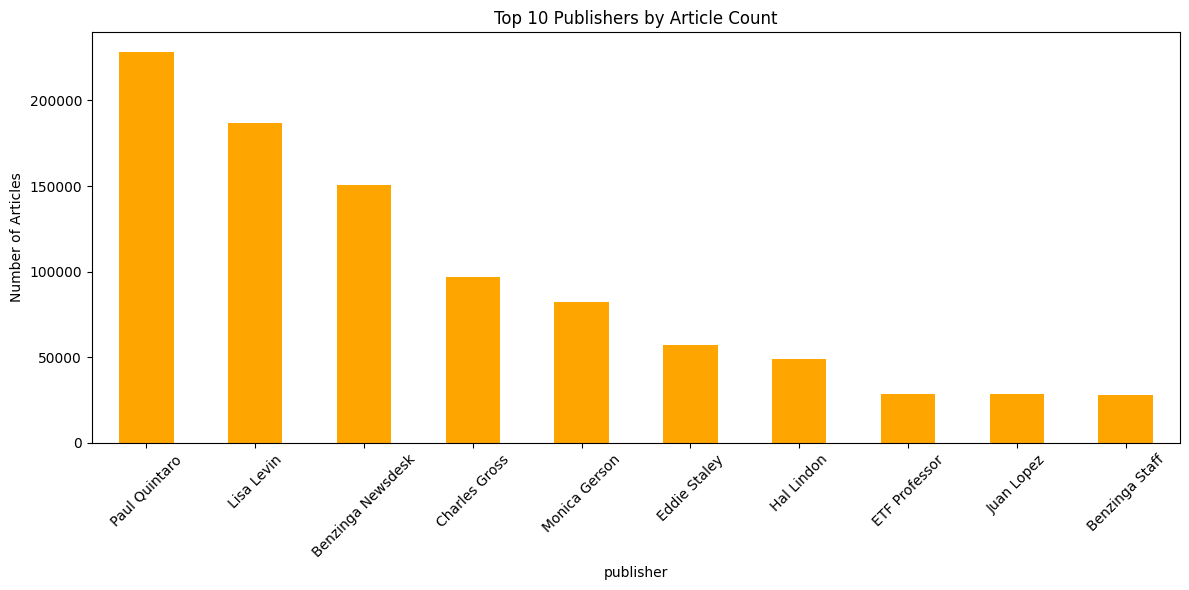

In [3]:
# Count articles per publisher
publisher_counts = news_df['publisher'].value_counts()

# Visualize top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Article Count')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


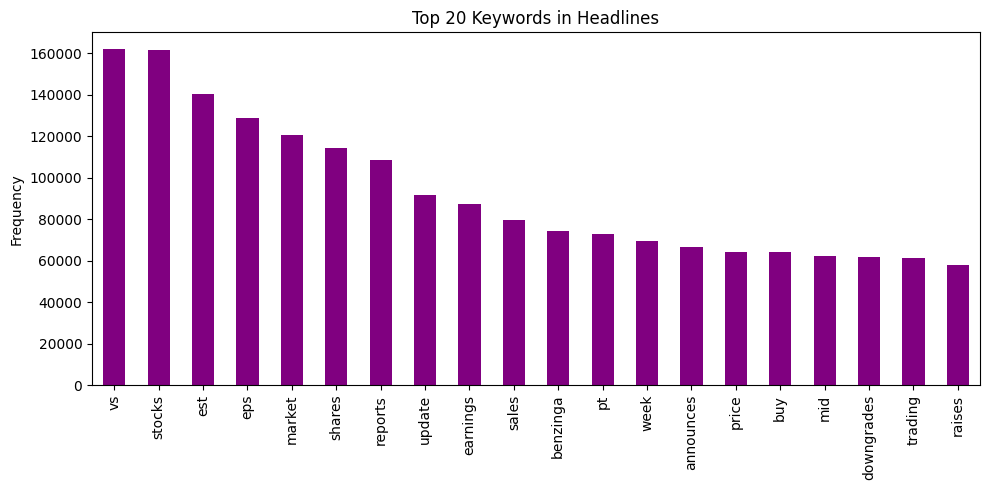

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to get top keywords
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(news_df['headline'].dropna().astype(str))

# Convert to frequency DataFrame
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = word_freq.sum().sort_values(ascending=False)

# Plot top words
top_words.plot(kind='bar', figsize=(10, 5), color='purple', title='Top 20 Keywords in Headlines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13248/1410425694.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=news_df, palette='viridis')


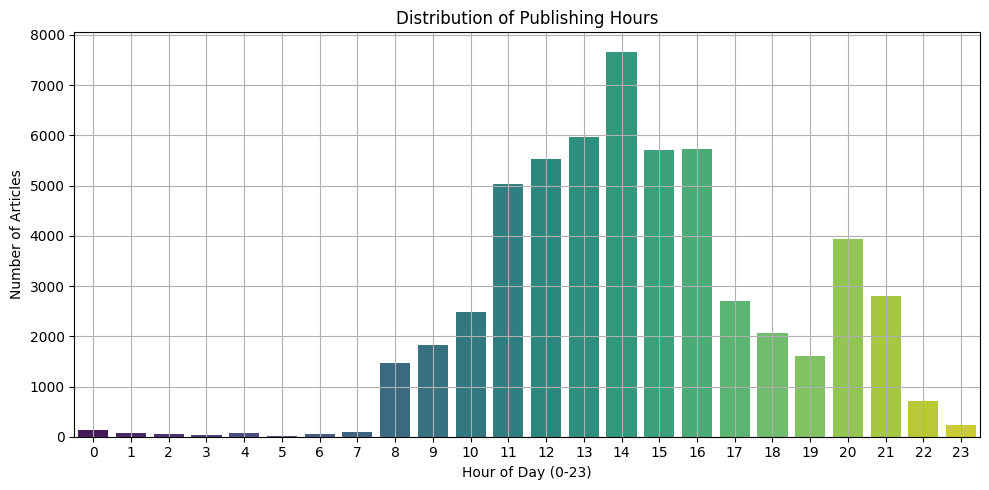

In [13]:
# Extract hour of publication from the datetime index (if not already present)
if 'hour' not in news_df.columns:
	news_df['hour'] = news_df.index.hour

# Plot article count by hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=news_df, palette='viridis')
plt.title('Distribution of Publishing Hours')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
top_publishers = news_df['publisher'].value_counts().head(3).index.tolist()

for publisher in top_publishers:
    subset = news_df[news_df['publisher'] == publisher]
    print(f"\n--- Common Words for {publisher} ---")
    all_text = ' '.join(subset['headline'].dropna().astype(str)).lower().split()
    word_series = pd.Series(all_text).value_counts().head(10)
    print(word_series)



--- Common Words for Benzinga Newsdesk ---
of         4263
to         4036
eps        3843
from       3443
sales      3374
the        3132
stocks     3079
shares     3021
trading    2875
in         2517
Name: count, dtype: int64

--- Common Words for Lisa Levin ---
stocks      6963
52-week     4964
on          4922
that        4783
hit         4694
lows        3208
biggest     2319
thursday    2038
movers      2027
for         1984
Name: count, dtype: int64

--- Common Words for ETF Professor ---
etfs     2277
etf      1507
to       1109
for       886
the       729
a         697
with      517
this      456
in        416
watch     347
Name: count, dtype: int64


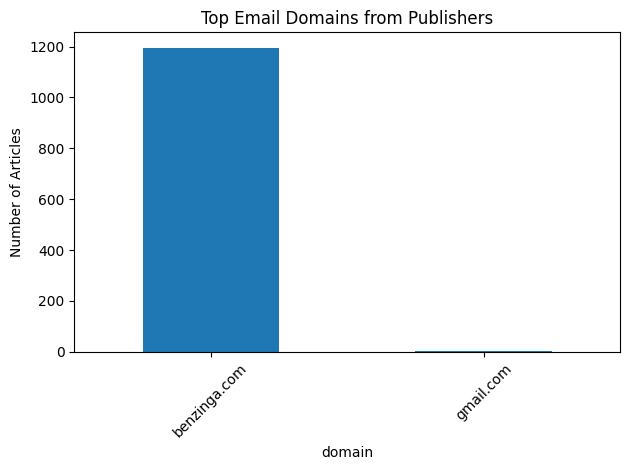

In [15]:
# Extract domain from email-format publishers
news_df['domain'] = news_df['publisher'].str.extract(r'@([A-Za-z0-9.-]+)')
domain_counts = news_df['domain'].value_counts().head(10)

# Plot top domains
domain_counts.plot(kind='bar', title='Top Email Domains from Publishers')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
